# Importing Libraries and Loading Data

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from tkinter import *
from tkinter import filedialog as fd
from tkinter.messagebox import showinfo

df=pd.read_csv('./listings-Highlighted.csv')

# Check the Data information columns names, types, non null 

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540 entries, 0 to 2539
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            2540 non-null   float64
 1   listing_url                                   2540 non-null   object 
 2   scrape_id                                     2540 non-null   float64
 3   last_scraped                                  2540 non-null   object 
 4   source                                        2540 non-null   object 
 5   name                                          2540 non-null   object 
 6   description                                   2479 non-null   object 
 7   neighborhood_overview                         1354 non-null   object 
 8   picture_url                                   2540 non-null   object 
 9   host_id                                       2540 non-null   i

# Remove duplicated rows

In [33]:
print(df.duplicated().value_counts())
if (df.duplicated().value_counts().unique()[0]!=df.shape[0]):
    print('There\'re some Duplicated Rows')
    df.drop_duplicates(inplace=True)
    print('We removed the duplicated rows - Now No Duplicated Rows')
    print(df.duplicated().value_counts())
else:
    print('No Duplicated Row')

False    2540
dtype: int64
No Duplicated Row


# Remove non helpful columns for the study - Keep (price, availability, location, property type and Demand 
 

In [34]:
removed_features=['listing_url','scrape_id','last_scraped','source','name','description','neighborhood_overview','picture_url','host_id','host_url','host_name','host_since','host_about','host_response_time','host_thumbnail_url','host_picture_url','host_neighbourhood']

In [35]:
removed_features+=['host_listings_count','host_total_listings_count','host_verifications','host_has_profile_pic','host_identity_verified','neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed','bathrooms','calendar_updated','license']

In [36]:
removed_features+=['host_response_rate','host_acceptance_rate','room_type','accommodates','bathrooms_text','bedrooms','beds','amenities','minimum_nights','maximum_nights','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','availability_30','availability_60','availability_90','calendar_last_scraped','number_of_reviews_ltm','number_of_reviews_l30d','first_review','last_review','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','reviews_per_month']

In [37]:
df.drop(removed_features,axis=1,inplace=True)

In [38]:
df.head(1)

,id,host_location,host_is_superhost,latitude,longitude,property_type,price,has_availability,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,50904.0,"Antwerp, Belgium",t,51.218575,4.398631,Room in boutique hotel,$174.00,t,250,3,5.0,5.0,5.0,5.0,5.0,5.0,5.0,f


In [39]:
df.shape

(2540, 18)

# Check Columns Properities

In [40]:
for i in range (df.shape[1]):
    print(df.columns[i])
    print('Nan cells = '+str(df.shape[0]-df[df.columns[i]].isna().value_counts()[0]))
    print('')

id
Nan cells = 0

host_location
Nan cells = 563

host_is_superhost
Nan cells = 413

latitude
Nan cells = 0

longitude
Nan cells = 0

property_type
Nan cells = 0

price
Nan cells = 0

has_availability
Nan cells = 0

availability_365
Nan cells = 0

number_of_reviews
Nan cells = 0

review_scores_rating
Nan cells = 456

review_scores_accuracy
Nan cells = 464

review_scores_cleanliness
Nan cells = 464

review_scores_checkin
Nan cells = 464

review_scores_communication
Nan cells = 464

review_scores_location
Nan cells = 464

review_scores_value
Nan cells = 464

instant_bookable
Nan cells = 0



# Filling Non value Cells

In [41]:
df['host_location'].fillna('Missing',inplace=True)

In [42]:
df['host_is_superhost'].fillna(df['host_is_superhost'].mode()[0],inplace=True)

In [43]:
df['review_scores_rating'].fillna(df['review_scores_rating'].min(),inplace=True)

In [44]:
df['review_scores_accuracy'].fillna(df['review_scores_accuracy'].min(),inplace=True)

In [45]:
df['review_scores_cleanliness'].fillna(df['review_scores_cleanliness'].min(),inplace=True)

In [46]:
df['review_scores_checkin'].fillna(df['review_scores_checkin'].min(),inplace=True)

In [47]:
df['review_scores_communication'].fillna(df['review_scores_communication'].min(),inplace=True)

In [48]:
df['review_scores_location'].fillna(df['review_scores_location'].min(),inplace=True)

In [49]:
df['review_scores_value'].fillna(df['review_scores_value'].min(),inplace=True)

In [50]:
for i in range (df.shape[1]):
    print(df.columns[i])
    print('Nan cells = '+str(df.shape[0]-df[df.columns[i]].isna().value_counts()[0]))
    print('')

id
Nan cells = 0

host_location
Nan cells = 0

host_is_superhost
Nan cells = 0

latitude
Nan cells = 0

longitude
Nan cells = 0

property_type
Nan cells = 0

price
Nan cells = 0

has_availability
Nan cells = 0

availability_365
Nan cells = 0

number_of_reviews
Nan cells = 0

review_scores_rating
Nan cells = 0

review_scores_accuracy
Nan cells = 0

review_scores_cleanliness
Nan cells = 0

review_scores_checkin
Nan cells = 0

review_scores_communication
Nan cells = 0

review_scores_location
Nan cells = 0

review_scores_value
Nan cells = 0

instant_bookable
Nan cells = 0



In [51]:
to_bool={'f':False,'t':True}

In [52]:
df['has_availability']=df['has_availability'].map(to_bool)
df['has_availability']

0        True
1        True
2        True
3        True
4        True
        ...  
2535     True
2536     True
2537     True
2538     True
2539    False
Name: has_availability, Length: 2540, dtype: bool

In [53]:
df['instant_bookable']=df['instant_bookable'].map(to_bool)
df['instant_bookable']

0       False
1       False
2       False
3       False
4        True
        ...  
2535    False
2536     True
2537    False
2538     True
2539    False
Name: instant_bookable, Length: 2540, dtype: bool

In [54]:
df['host_is_superhost']=df['host_is_superhost'].map(to_bool)
df['host_is_superhost']

0        True
1        True
2        True
3       False
4       False
        ...  
2535    False
2536    False
2537    False
2538    False
2539    False
Name: host_is_superhost, Length: 2540, dtype: bool

In [55]:
df['price']=df['price'].apply(lambda x: x.replace(',', '')).apply(lambda x: x.replace('$', '')).astype(float)
df['price']

0       174.0
1       113.0
2        66.0
3        79.0
4        40.0
        ...  
2535     72.0
2536     55.0
2537     60.0
2538     75.0
2539     80.0
Name: price, Length: 2540, dtype: float64

# Analysis & Visualizing

#  Check host_location

In [56]:
df['host_location'].value_counts()

Antwerp, Belgium           1572
Missing                     563
Antwerpen, Belgium           42
Belgium                      41
Bruges, Belgium              29
                           ... 
Walsoorden, Netherlands       1
Charleroi, Belgium            1
Flanders, Belgium             1
Moscow, Russia                1
Namur, Belgium                1
Name: host_location, Length: 122, dtype: int64

In [57]:
#To0 much Country, Drop non effective country
x=df['host_location'].value_counts()
m=[]
for i in range (x.shape[0]):
    if x[i] > 5:
        m+=[x.index[i]]
print('The Effective '+str(len(m))+' Country only ')
print(m)
df1=df.copy()

for i in range(df1.shape[0]):
    if df1['host_location'][i] in m:
        pass
    else:
        df1.drop(i,inplace=True)

The Effective 17 Country only 
['Antwerp, Belgium', 'Missing', 'Antwerpen, Belgium', 'Belgium', 'Bruges, Belgium', 'Brussels, Belgium', 'Knokke-Heist, Belgium', 'Schilde, Belgium', 'Rotterdam, Netherlands', 'Wuustwezel, Belgium', 'Schoten, Belgium', 'Amsterdam, Netherlands', 'Zoersel, Belgium', 'Leuven, Belgium', 'Brasschaat, Belgium', 'Tallinn, Estonia', 'Edegem, Belgium']


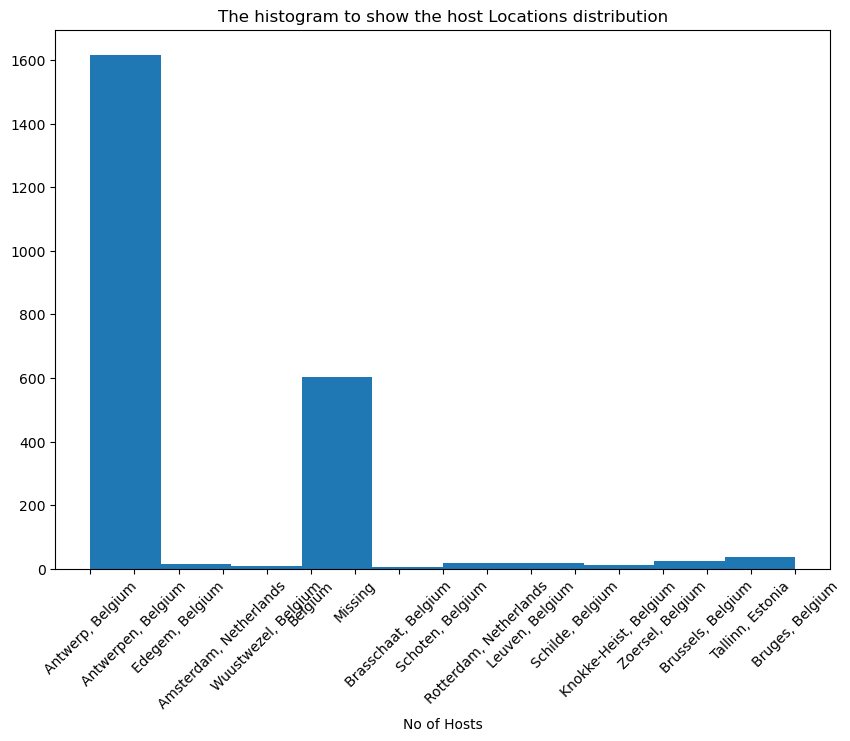

the Mode Country is Antwerp, Belgium ( 1572 )


In [58]:
plt.figure(figsize=(10,7))
plt.hist(df1['host_location'])
plt.title('The histogram to show the host Locations distribution')
plt.xlabel('Host Locations')
plt.xlabel('No of Hosts')
plt.xticks(rotation=45)
plt.show()
print('the Mode Country is '+df['host_location'].mode()[0]+' ( '+str(df['host_location'].value_counts().head()[0])+' )')

<Axes: xlabel='host_is_superhost', ylabel='count'>

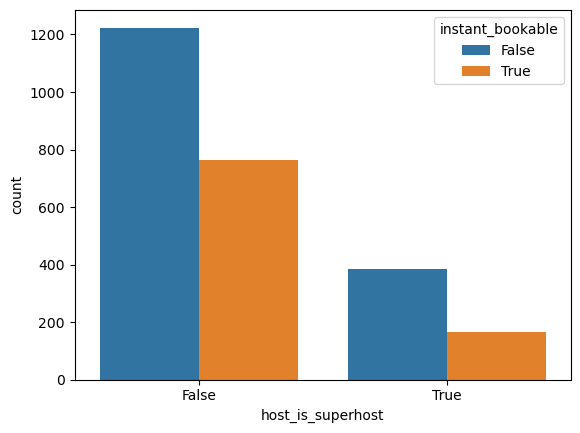

In [59]:
sns.countplot(x='host_is_superhost', hue = 'instant_bookable',data = df)

In [60]:
pd.crosstab(df['host_is_superhost'],df['instant_bookable'],normalize=False,margins=True)

instant_bookable,False,True,All
host_is_superhost,,,
False,1224,765,1989
True,384,167,551
All,1608,932,2540


# the super host and instant bookable true is tiny. But non super host and not instant bookable is the highest so most of hosts prefer to be non instant bookable where most of them is lazy so we nee to check with reviews

In [61]:
df.head(2)

,id,host_location,host_is_superhost,latitude,longitude,property_type,price,has_availability,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,50904.0,"Antwerp, Belgium",True,51.218575,4.398631,Room in boutique hotel,174.0,True,250,3,5.00,5.00,5.00,5.0,5.0,5.00,5.00,False
1,224682.0,"Antwerp, Belgium",True,51.219060,4.399550,Entire rental unit,113.0,True,326,500,4.78,4.82,4.83,4.9,4.9,4.97,4.73,False


<Axes: xlabel='host_is_superhost', ylabel='count'>

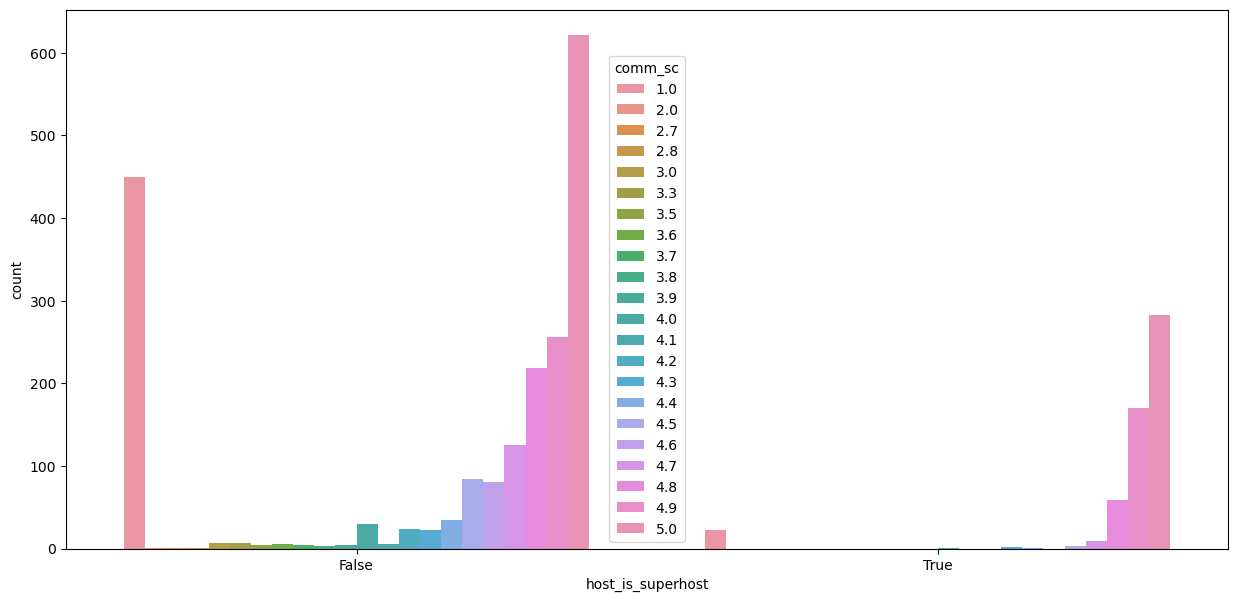

In [62]:
df['comm_sc']=round(df['review_scores_communication'].astype(float),1)
plt.figure(figsize=(15,7))
sns.countplot(x='host_is_superhost',hue='comm_sc',data=df)

# To being a super host has high propability to has higher review score but there're many non super hostes had a bad review.
# Most of bad review are non super host

In [63]:
df.price.describe()

count    2540.000000
mean      121.991732
std       176.739587
min        14.000000
25%        65.000000
50%        91.000000
75%       131.000000
max      5620.000000
Name: price, dtype: float64

In [64]:
df['price_rate']=round(((df['price'].astype(float))/200),0)*200
print(df[['price','price_rate']])
print(df[['price','price_rate']].describe())

      price  price_rate
0     174.0       200.0
1     113.0       200.0
2      66.0         0.0
3      79.0         0.0
4      40.0         0.0
...     ...         ...
2535   72.0         0.0
2536   55.0         0.0
2537   60.0         0.0
2538   75.0         0.0
2539   80.0         0.0

[2540 rows x 2 columns]
             price   price_rate
count  2540.000000  2540.000000
mean    121.991732    97.559055
std     176.739587   198.879162
min      14.000000     0.000000
25%      65.000000     0.000000
50%      91.000000     0.000000
75%     131.000000   200.000000
max    5620.000000  5600.000000


<Axes: xlabel='price'>

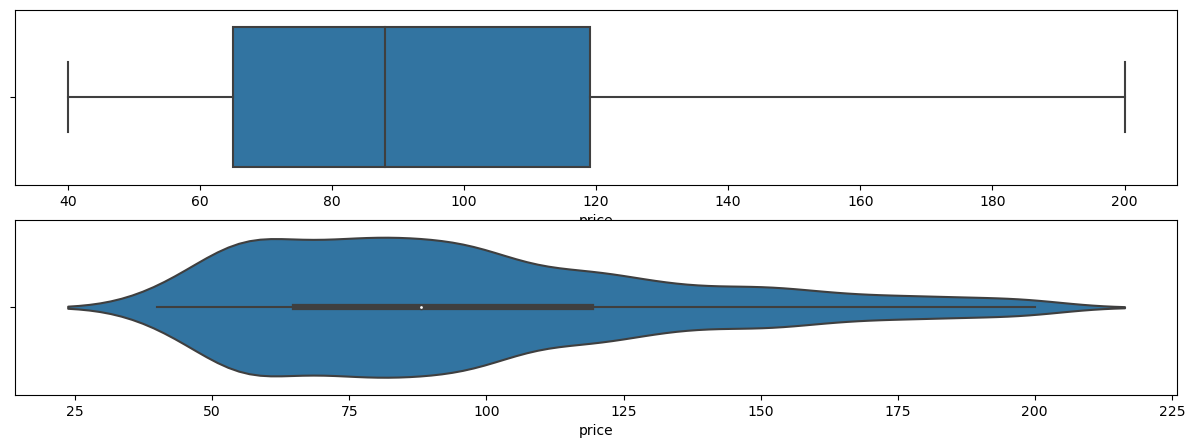

In [65]:
fig, axes = plt.subplots(2, 1, figsize=(15, 5), sharey=True)
price_query=df.query("`price` >= 40 and `price` <= 200")['price']
sns.boxplot(ax=axes[0],x=price_query)
sns.violinplot(ax=axes[1],x=price_query)

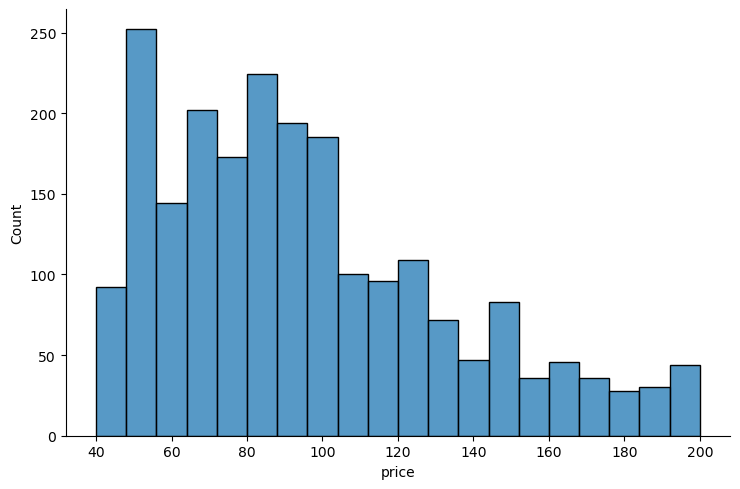

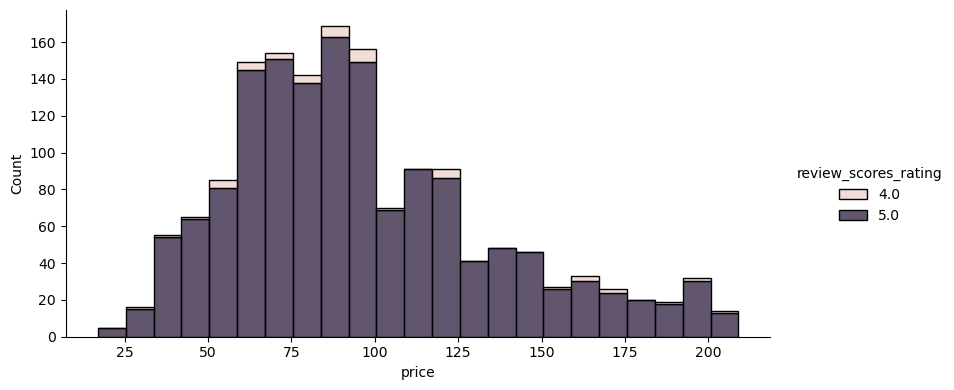

In [66]:
sns.displot(df,x=df.query("`price` >= 40 and `price` <= 200")['price'],aspect=1.5)
scores=round((df[df['review_scores_rating']>=4.5]['review_scores_rating']),0)
sns.displot(df,x=df[df['price']< 210]['price'],hue=scores,multiple='stack',aspect=2,height=4)

# most prices between 50 & 135
# pricing has an effect on customer scores.

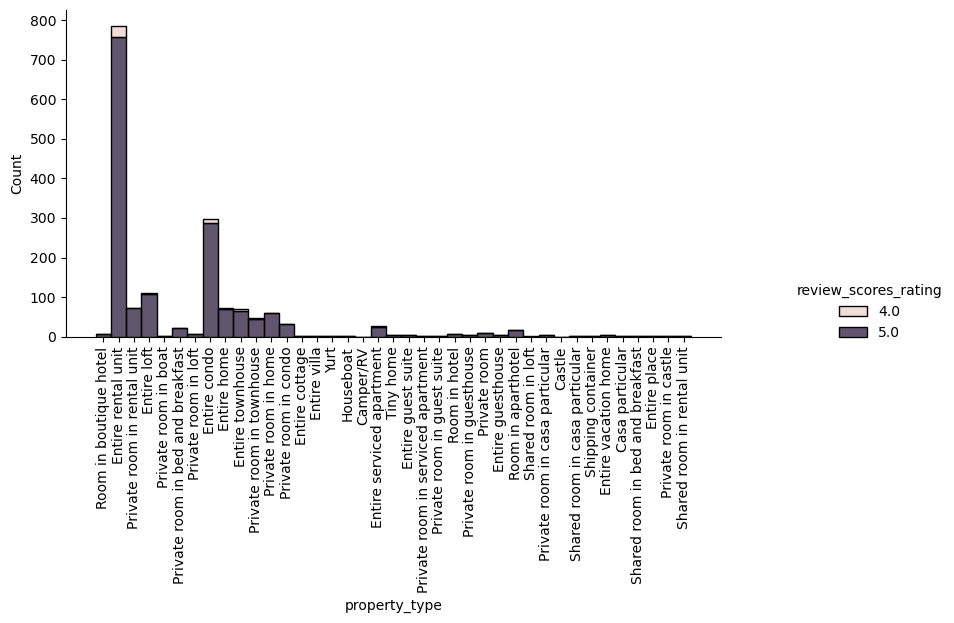

In [67]:
sns.displot(df,x=df['property_type'],hue=scores,multiple='stack',aspect=2,height=4)
plt.xticks(rotation=90)
plt.show()

# Customers prefer units then condo

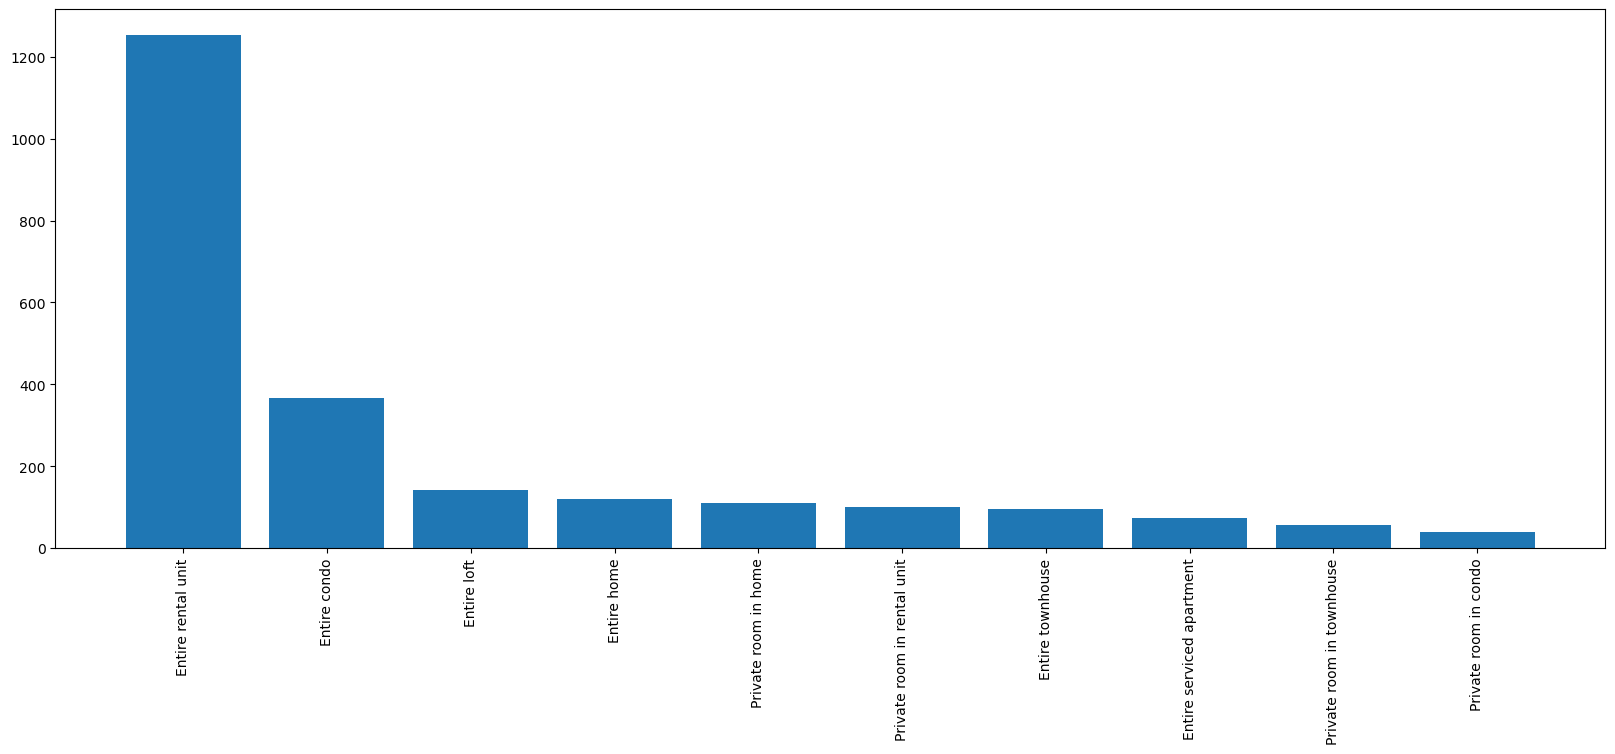

In [68]:
prop_ty=df['property_type'].value_counts().head(10).keys()
prop_count=df['property_type'].value_counts().head(10).to_list()
plt.figure(figsize=(20,7))
plt.xticks(rotation=90)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.bar(prop_ty, prop_count)
plt.show()

# most Properties is Unit and Condo

median     86.5
count    1254.000000
mean      106.484051
std       169.718699
min        28.000000
25%        65.000000
50%        86.500000
75%       118.000000
max      5620.000000
Name: price, dtype: float64


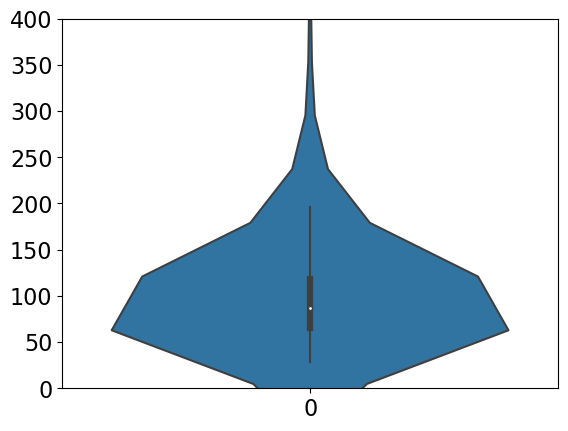

In [69]:
entire_unit = df[df['property_type']=='Entire rental unit']['price'].to_list()
sns.violinplot(entire_unit)
plt.ylim(0,400)
print('median    ',df[df['property_type']=='Entire rental unit']['price'].median())
print(df[df['property_type']=='Entire rental unit']['price'].describe())

median     4.67
count    1254.000000
mean        3.839745
std         1.798037
min         0.000000
25%         4.072500
50%         4.670000
75%         4.900000
max         5.000000
Name: review_scores_rating, dtype: float64


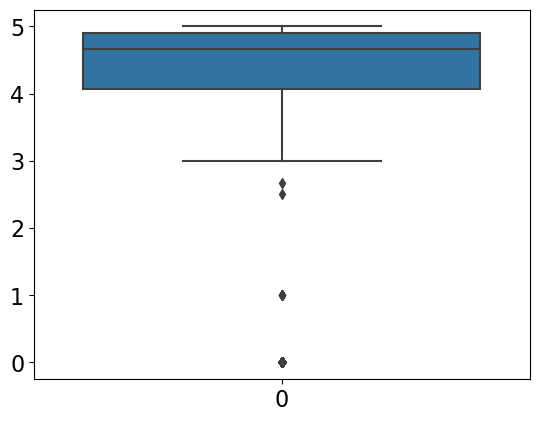

In [70]:
entire_score = df[df['property_type']=='Entire rental unit']['review_scores_rating'].to_list()
sns.boxplot(entire_score)
print('median    ',df[df['property_type']=='Entire rental unit']['review_scores_rating'].median())
print(df[df['property_type']=='Entire rental unit']['review_scores_rating'].describe())

median     96.0
count    366.000000
mean     111.795082
std       54.884128
min       38.000000
25%       79.250000
50%       96.000000
75%      129.750000
max      520.000000
Name: price, dtype: float64


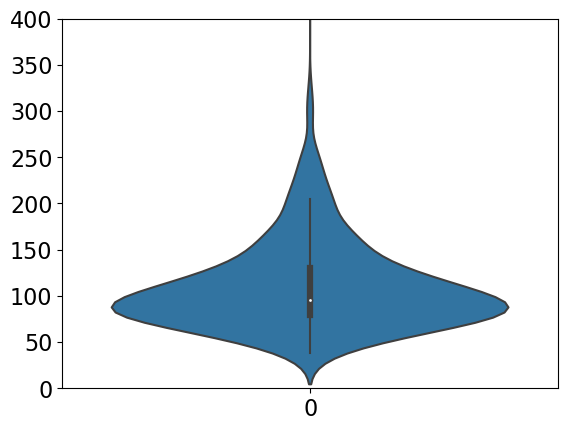

In [71]:
entire_unit = df[df['property_type']=='Entire condo']['price'].to_list()
sns.violinplot(entire_unit)
plt.ylim(0,400)
print('median    ',df[df['property_type']=='Entire condo']['price'].median())
print(df[df['property_type']=='Entire condo']['price'].describe())

median     4.83
count    366.000000
mean       4.309836
std        1.449582
min        0.000000
25%        4.590000
50%        4.830000
75%        5.000000
max        5.000000
Name: review_scores_rating, dtype: float64


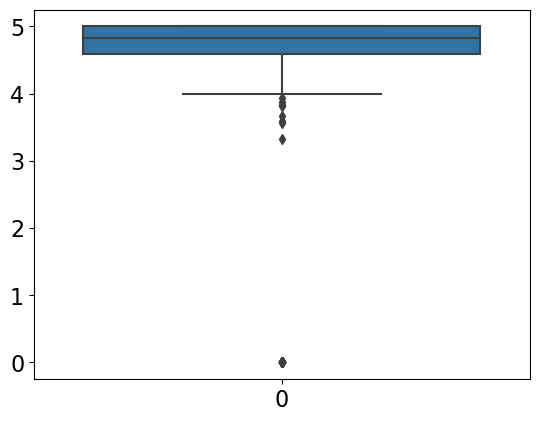

In [72]:
entire_score = df[df['property_type']=='Entire condo']['review_scores_rating'].to_list()
sns.boxplot(entire_score)
print('median    ',df[df['property_type']=='Entire condo']['review_scores_rating'].median())
print(df[df['property_type']=='Entire condo']['review_scores_rating'].describe())

# Customer prefer unit then condo
# Price of unit is less than condo
# proposing to increasing the units

In [73]:
df.head(5)

,id,host_location,host_is_superhost,latitude,longitude,property_type,price,has_availability,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,comm_sc,price_rate
0,50904.0,"Antwerp, Belgium",True,51.218575,4.398631,Room in boutique hotel,174.0,True,250,3,5.00,5.00,5.00,5.00,5.00,5.00,5.00,False,5.0,200.0
1,224682.0,"Antwerp, Belgium",True,51.219060,4.399550,Entire rental unit,113.0,True,326,500,4.78,4.82,4.83,4.90,4.90,4.97,4.73,False,4.9,200.0
2,345959.0,"Antwerp, Belgium",True,51.201500,4.400040,Entire rental unit,66.0,True,301,90,4.80,4.84,4.86,4.88,4.86,4.53,4.78,False,4.9,0.0
3,363155.0,"Antwerp, Belgium",False,51.221090,4.418120,Entire rental unit,79.0,True,308,27,4.85,4.96,4.93,5.00,5.00,4.67,4.85,False,5.0,0.0
4,366252.0,"Antwerp, Belgium",False,51.216020,4.434720,Private room in rental unit,40.0,True,240,146,4.62,4.67,4.35,4.87,4.88,4.41,4.64,True,4.9,0.0


(array([501., 194., 172., 127., 215.,  93.,  87., 168., 325., 658.]),
 array([  0. ,  36.5,  73. , 109.5, 146. , 182.5, 219. , 255.5, 292. ,
        328.5, 365. ]),
 <BarContainer object of 10 artists>)

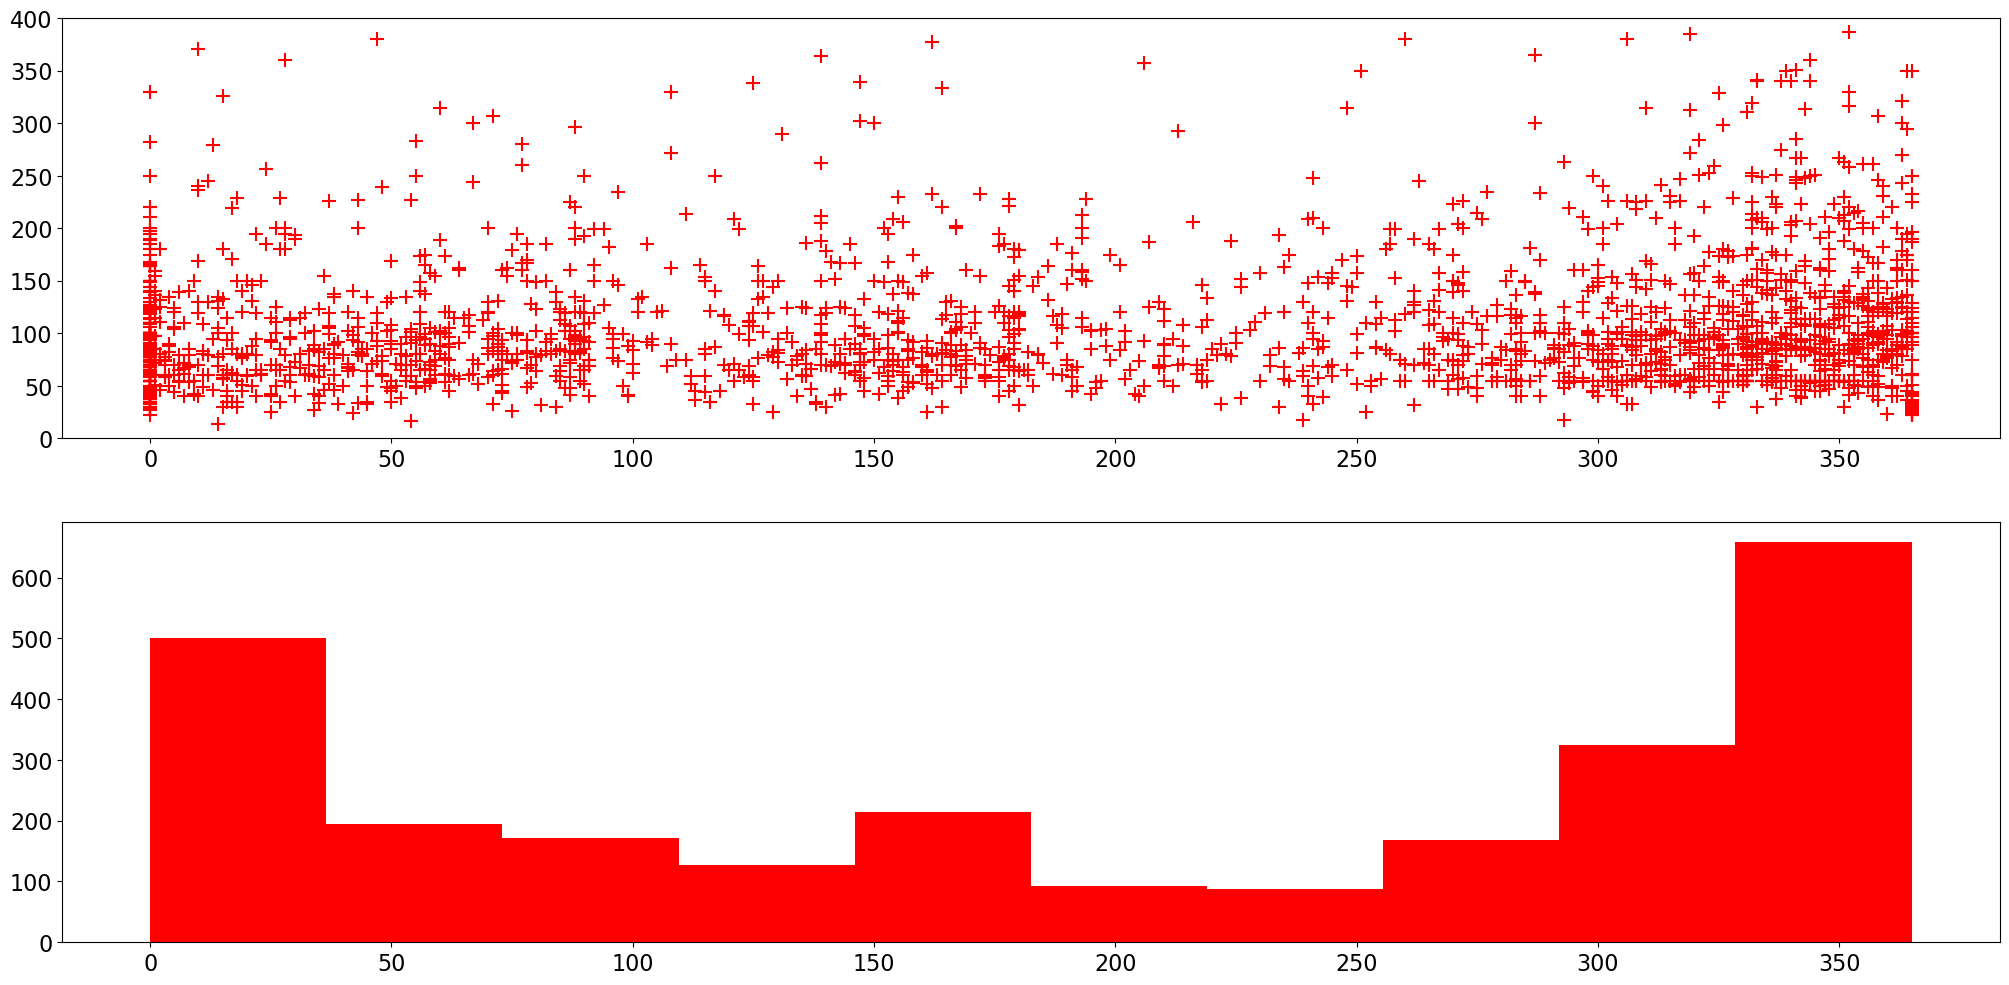

In [74]:
fig,axes=plt.subplots(2,1,figsize=(25,12),gridspec_kw={'height_ratios': [1, 1]})
axes[0].scatter(df['availability_365'],df['price'],marker='+',c='red',s=100)
axes[0].set_ylim(0, 400)
axes[1].hist(df['availability_365'],color='red')
#axes[1].set_ylim(0, 1000)
#sns.countplot(data=df,x='availability_365')


In [75]:
df['av_percent']=round(df['availability_365'].astype(float)/365,1)*100
pd.crosstab(df['av_percent'],df['price_rate'],margins=True)

price_rate,0.0,200.0,400.0,600.0,800.0,1000.0,1200.0,2000.0,2200.0,3200.0,5600.0,All
av_percent,,,,,,,,,,,,
0.0,273,116,7,2,2,0,0,0,0,0,0,400
10.0,134,56,3,1,1,0,0,0,0,0,0,195
20.0,141,83,5,0,1,0,0,0,0,1,1,232
30.0,47,43,2,0,0,0,0,0,0,0,0,92
40.0,121,55,7,1,1,0,0,0,0,0,0,185
50.0,80,71,2,2,1,0,0,0,1,0,0,157
60.0,46,26,1,0,0,0,0,0,0,0,0,73
70.0,70,61,5,2,0,1,0,0,0,0,0,139
80.0,141,77,8,4,0,1,0,0,0,0,0,231


<Figure size 2000x700 with 0 Axes>

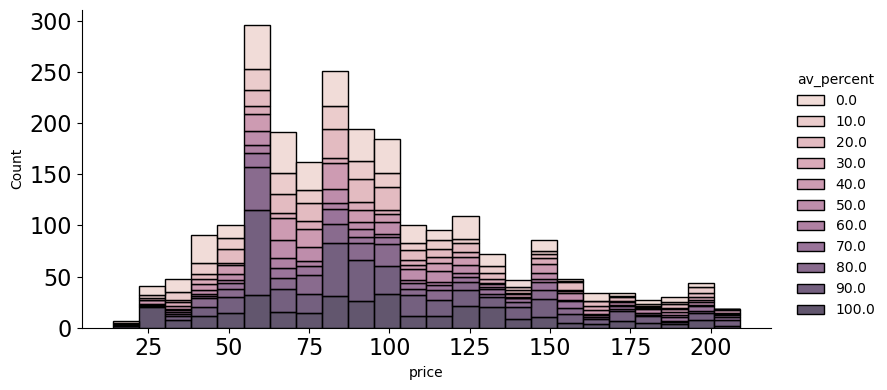

In [76]:
plt.figure(figsize=(20,7))
sns.displot(df,x=df[df['price']< 210]['price'],hue=df["av_percent"],multiple='stack',aspect=2,height=4)

# units with prices between 50 & 125 is have variant in availability which mean it the best choice in the point view of the customers and the hostes.

# 

# The Conclusions:
# The most preferable type is rental entire unit with price range (55-135). The second Choice entire condo with price range (55-135). The best hostes is the super hostes with/without the instant bookable option then the normal hostes with the instant bookable option. Intstant bookable is prefered